<a href="https://colab.research.google.com/github/DanielCreeklear/Simulacao_misseis/blob/main/Coordenadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

# Funções

In [2]:
def criarCoordenadas(quantidade, intervalo):
  default_latitude = float(-23.0000001)
  default_longitude = float(-46.0000001)
  latitude = [round(random.uniform(default_latitude, default_latitude - intervalo), 7) for x in range(quantidade)]
  longitude = [round(random.uniform(default_longitude, default_longitude - intervalo), 7) for x in range(quantidade)]
  coordenadas = {'latitude': latitude, 'longitude': longitude}
  df = pd.DataFrame(coordenadas)
  return df

Fórmula para converter Latitude ou Longitude em decimal

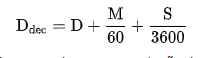

In [3]:
def converterIntervalosMetros(metros):
  delta_Latitude_Longitude = metros / (2**(1/2))
  return int(delta_Latitude_Longitude)*(10**-7)

In [45]:
def converterGraus_Metros(Graus, Minutos, Segundos):
  return (((Graus * 60) + (Minutos) + (Segundos / 60)) * 1.852)

In [57]:
def calcularDistanciaCoordenadas_to_Metros(CoordenadaInicial, CoordenadaFinal):
  if identificarTipoCoordenada(CoordenadaInicial) == 'Decimal':
    CoordenadaInicial = trocarTipoCoordenada(CoordenadasInicial)
  elif identificarTipoCoordenada(CoordenadaFinal) == 'Decimal':
    CoordenadaFinal = trocarTipoCoordenada(CoordenadaFinal)
  return subtrairGraus(CoordenadaInicial, CoordenadaFinal)

In [54]:
def subtrairGraus(Inicial, Final):
  GrausInicial, MinutosInicial, SegundosInicial = lerCoordenadasGraus(Inicial)
  GrausFinal, MinutosFinal, SegundosFinal = lerCoordenadasGraus(Final)
  return '{0}° {1}\' {2}\"'.format(int(GrausFinal - GrausInicial), int(MinutosFinal - MinutosInicial), int(SegundosFinal - SegundosInicial))

In [55]:
def identificarTipoCoordenada(Coordenada):
  if type(Coordenada) == 'string':
    return 'Graus'
  if type(Coordenada) == 'float':
    return 'Decimal'
  else:
    return None

In [31]:
def trocarTipoCoordenada(Coordenada, Tipo):
  if Tipo == 'Graus':
    Graus, Minutos, Segundos = lerCoordenadasGraus(Coordenada)
    return converterCoordenadas_to_Decimal(Graus, Minutos, Segundos)
  if Tipo == 'Decimal':
    return converterDecimal_to_Coordenadas(Coordenada)

In [5]:
def truncar(x, n):
  return (((10 ** n) * x) / 10 ** n)

In [6]:
def converterCoordenadas_to_Decimal(graus, minutos, segundos):
  return (graus + (minutos/60) + (segundos/3600))

In [7]:
def converterDecimal_to_Coordenadas(CoordenadasDecimal):
  Graus = truncar(CoordenadasDecimal, 0)
  Minutos = truncar((abs(CoordenadasDecimal) * 60) % 60, 0)
  Segundos = (abs(CoordenadasDecimal) * 3600) % 60
  return '{0}° {1}\' {2}\"'.format(int(Graus), int(Minutos), int(Segundos))

In [19]:
def lerCoordenadasGraus(CoordenadasGrau):
  Coordenadas = CoordenadasGrau.replace(' ', '')
  indexGraus = []
  indexMinutos = []
  indexSegundos = []
  GrausPreenchido = False
  MinutosPreenchido = False
  SegundosPreenchido = False
  i = 0
  while i < len(Coordenadas):
    caracter = Coordenadas[i]
    if not (caracter.isdigit()) and not (caracter == '-'):
      if not (GrausPreenchido):
        indexGraus.append(0)
        indexGraus.append(i)
        GrausPreenchido = True
      elif not (MinutosPreenchido):
        indexMinutos.append(indexGraus[1] + 1)
        indexMinutos.append(i)
        MinutosPreenchido = True
      elif not (SegundosPreenchido):
        indexSegundos.append(indexMinutos[1] + 1)
        indexSegundos.append(i)
        SegundosPreenchido = True
    i += 1
  Graus = int(Coordenadas[indexGraus[0]:indexGraus[1]])
  Minutos = int(Coordenadas[indexMinutos[0]:indexMinutos[1]])
  Segundos = int(Coordenadas[indexSegundos[0]:indexSegundos[1]])
  return Graus, Minutos, Segundos

In [11]:
coordenadas = '23° 27\' 8\"'
coordenadasDecimal = converterCoordenadas_to_Decimal(lerCoordenadasGraus(coordenadas)[0], lerCoordenadasGraus(coordenadas)[1], lerCoordenadasGraus(coordenadas)[2])
LatAndLon = converterDecimal_to_Coordenadas(coordenadasDecimal)
print(coordenadasDecimal)
print(LatAndLon)

23.452222222222222
23° 27' 8"


In [58]:
CoordenadasInicial = [converterDecimal_to_Coordenadas(-23.746926592484332), converterDecimal_to_Coordenadas(-46.68452322989165)]
print('Latitude Inicial: {0} Longitude Inicial: {1}'.format(CoordenadasInicial[0], CoordenadasInicial[1]))
Graus, Minutos, Segundos = lerCoordenadasGraus(CoordenadasInicial[0])
print('Metros Latitude Inicial:', converterGraus_Metros(Graus, Minutos, Segundos))
LatitudeInicial = converterCoordenadas_to_Decimal(Graus, Minutos, Segundos)
Graus, Minutos, Segundos = lerCoordenadasGraus(CoordenadasInicial[1])
print('Metros Longitude Inicial:', converterGraus_Metros(Graus, Minutos, Segundos))
LongitudeInicial = converterCoordenadas_to_Decimal(Graus, Minutos, Segundos)
CoordenadasFinal = [converterDecimal_to_Coordenadas(-23.74694930195004), converterDecimal_to_Coordenadas(-46.684029284195844)]
print('Latitude Final: {0} Longitude Final: {1}'.format(CoordenadasFinal[0], CoordenadasFinal[1]))
Graus, Minutos, Segundos = lerCoordenadasGraus(CoordenadasFinal[0])
LatitudeFinal = converterCoordenadas_to_Decimal(Graus, Minutos, Segundos)
Graus, Minutos, Segundos = lerCoordenadasGraus(CoordenadasFinal[1])
LongitudeFinal = converterCoordenadas_to_Decimal(Graus, Minutos, Segundos)
print('Distância em metros Latitude: {0} Distância em metros Longitude: {1}'.format(calcularDistanciaCoordenadas_to_Metros(CoordenadasInicial[0], CoordenadasFinal[0]), DeltaMetrosLongitude))

Latitude Inicial: -23° 44' 48" Longitude Inicial: -46° 41' 4"
Metros Latitude Inicial: -2472.7904000000003
Metros Longitude Inicial: -5035.464533333334
Latitude Final: -23° 44' 49" Longitude Final: -46° 41' 2"
Distância em metros Latitude: 0° 0' 1" Distância em metros Longitude: 64.0862660914428


In [51]:
((-2472.7904000000003**2) - ((-5035.464533333334)**2))**1/2

-15735297.714395026

In [ ]:
def simularPontos(vezes, quantidadeFuncionarios, ladoMetros):
  ResultadoSucessos = []
  ResultadoFalhas = []
  TamanhoMetros = [ladoMetros for x in range(vezes)]
  for n in tqdm(range(vezes)):
    intervaloLatLong = converterIntervalosMetros(ladoMetros)
    ConjuntoCoordenadas = criarCoordenadas(quantidadeFuncionarios, intervaloLatLong)
    CirculoConfig = {'coordenadas': [(-23.0000001 - intervaloLatLong/2), (-46.0000001 - intervaloLatLong/2)], 'raio': intervaloLatLong/2}
    Sucessos = int()
    Falhas = int()
    for ponto in ConjuntoCoordenadas.values.tolist():
      if (abs((ponto[0] - CirculoConfig['coordenadas'][0])**2) + abs((ponto[1] - CirculoConfig['coordenadas'][1])**2))**(1/2) < CirculoConfig['raio']:
        Sucessos += 1
      else:
        Falhas += 1
    ResultadoSucessos.append(Sucessos)
    ResultadoFalhas.append(Falhas)
  ResultadoTeste = {'Sucessos': ResultadoSucessos, 'Falhas': ResultadoFalhas, 'TamanhoLado': TamanhoMetros}
  return pd.DataFrame(ResultadoTeste)

# Teste visual

Sucessos: 7
Falhas: 3


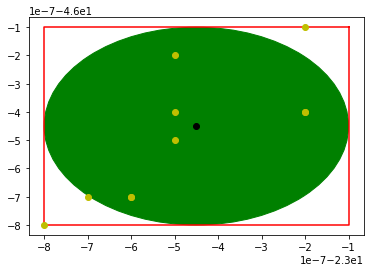

In [ ]:
intervaloLatLong = converterIntervalosMetros(10)
ConjuntoCoordenadas = criarCoordenadas(10, intervaloLatLong)

CirculoConfig = {'coordenadas': [(-23.0000001 - intervaloLatLong/2), (-46.0000001 - intervaloLatLong/2)], 'raio': intervaloLatLong/2}
circulo = plt.Circle(CirculoConfig['coordenadas'], CirculoConfig['raio'], color='g', fill=True)

fig, ax = plt.subplots()

ax.plot((-23.0000001 - intervaloLatLong/2), (-46.0000001 - intervaloLatLong/2), 'o', color='black')
ax.plot([-23.0000001,-23.0000001 - intervaloLatLong, -23.0000001 - intervaloLatLong, -23.0000001, -23.0000001],[-46.0000001,-46.0000001, -46.0000001 - intervaloLatLong, -46.0000001 - intervaloLatLong, -46.0000001], '-', color='r')
ax.plot(ConjuntoCoordenadas['latitude'], ConjuntoCoordenadas['longitude'], 'o', color='y')
ax.add_artist(circulo)

ConjuntoCoordenadas.head(5)
Sucessos = int()
Falhas = int()
for ponto in ConjuntoCoordenadas.values.tolist():
  if (abs((ponto[0] - CirculoConfig['coordenadas'][0])**2) + abs((ponto[1] - CirculoConfig['coordenadas'][1])**2))**(1/2) < CirculoConfig['raio']:
    Sucessos += 1
  else:
    Falhas += 1
print('Sucessos: {0}\nFalhas: {1}'.format(Sucessos, Falhas))

# Simulação

100%|██████████| 10000/10000 [00:38<00:00, 261.50it/s]


Quantidade de testes: 10000
Média de sucessos: 785.6422
Média de falhas: 214.3578

Moda sucessos: 0    784
dtype: int64
Moda falhas: 0    216
dtype: int64


(array([   7.,   59.,  339., 1153., 2447., 2979., 1938.,  879.,  178.,
          21.]),
 array([734. , 743.7, 753.4, 763.1, 772.8, 782.5, 792.2, 801.9, 811.6,
        821.3, 831. ]),
 <a list of 10 Patch objects>)

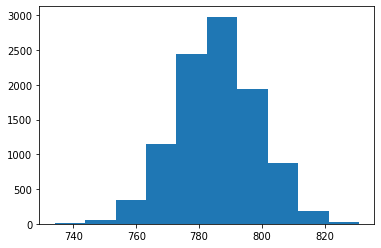

In [ ]:
vezes = 10000
Empresa100metros = simularPontos(vezes, quantidadeFuncionarios=1000, ladoMetros=10000)
print('\nQuantidade de testes: {0}\nMédia de sucessos: {1}\nMédia de falhas: {2}'.format(vezes,Empresa100metros['Sucessos'].mean(), Empresa100metros['Falhas'].mean()))
print('\nModa sucessos: {0}\nModa falhas: {1}'.format(Empresa100metros['Sucessos'].mode(), Empresa100metros['Falhas'].mode()))
fig, ax = plt.subplots()
ax.hist(Empresa100metros['Sucessos'])


(array([ 942., 2377., 3080.,    0., 2128., 1066.,    0.,  319.,   77.,
          11.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

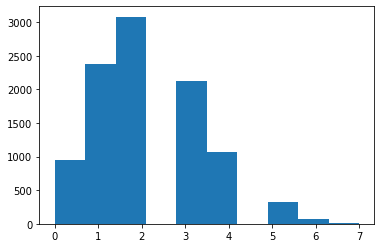

In [ ]:
plt.hist(Empresa100metros['Falhas'])

In [ ]:
Empresa100metros.query('Sucessos == 0 or Falhas == 0').head()

,Sucessos,Falhas,TamanhoLado
44,10,0,1000
61,10,0,1000
73,10,0,1000
76,10,0,1000
87,10,0,1000
